# IMID
- Two-class classification, or binary classification - classfity movie review as posivive or negative, based on the text content of the reviews
- 50000개(train, test로 안나뉨)
- train, test로 나누어주어야 한다.
- IMDB dataset the reviews (sequences of words) into sequences of integers
- 단어는 대문자가 아닌 소문자로 되어있음.

In [1]:
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
import numpy as np
import random

### num_words=5000
- 5,000 most frequently occurring words in thr training data

In [2]:
num_words = 5000

In [3]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=num_words)

In [4]:
print("추출한 단어 인덱스의 범위: 0 ~",max([max(sequence) for sequence in train_data]))

추출한 단어 인덱스의 범위: 0 ~ 4999


In [5]:
total_train_size = len(train_data)
total_test_size = len(test_data)
print("train데이터 개수:",total_train_size)
print("test데이터 개수:",total_test_size)

train데이터 개수: 25000
test데이터 개수: 25000


In [6]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

### 0 stands for negative and 1 stands for positive

In [7]:
evaluate = {0:"negative",1:"positive"}

### processing_word_index

In [8]:
word_index = imdb.get_word_index()

In [9]:
print("전체 단어 인덱스의 개수:",len(word_index))

전체 단어 인덱스의 개수: 88584


In [10]:
reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()]
)

In [11]:
num = random.randint(0,total_train_size-1)
decode_review = ' '.join(
    [reverse_word_index.get(i-3, "") for i in train_data[num]]
)

In [12]:
print(decode_review)
print("")
print("label=",evaluate[train_labels[num]])

  romantic innovative and funny the vision of this extraordinary film is almost   better known death  such as ghost while we know  that peter and june will find ultimate happiness at the end of that long long  the joy is in the journey the moral of the tale of course is timeless love  all but the struggle to achieve that  is played in a   of  vision and gripping  with more than    extras portraying various ages and  the  vision of heaven remains memorable six decades later far into the cgi era br br yet for all the  scale powell and  knew an essential truth the best story is told at the  level the wonderfully  romantic aspect of  is captured with ultimate simplicity    on a rose  br br this film like the story and the set itself is one for the ages

label= positive


## Preparing the data
- 단어들에 대한 연결성 보단 어떤 단어들이 들어있는지에 중점을 두었다.

### 개선점
results[i,] = 1. 으로만 하면 한 원소의 특징이 모두 1로 바뀌어 문제가 생긴다. <br>
그러므로 results[i][sequence]으로 바꾸어 특정 원소만 1로 바꾸어 준다.

In [13]:
def vectorize_sequences(sequences, dimension= num_words):
    results = np.zeros((len (sequences), dimension))
    print("데이터 형태:",results.shape)
    for i , sequence in enumerate(sequences):
        results[i][sequence] = 1.
    return results

In [14]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

데이터 형태: (25000, 5000)
데이터 형태: (25000, 5000)


In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Data Analysis

### train_data positive 데이터 negative 데이터 분석

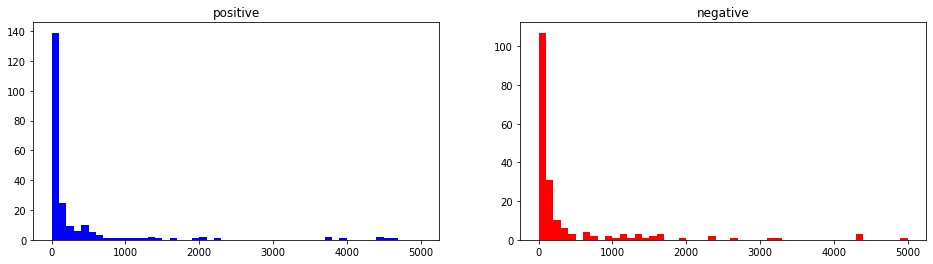

In [17]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.hist(train_data[0],color="blue",bins=50,range=(0,5000))
plt.title(str(evaluate[train_labels[0]]))

plt.subplot(1,2,2)
plt.hist(train_data[1],color="red",bins=50, range=(0,5000))
plt.title(str(evaluate[train_labels[1]]))
plt.show()

위의 그래프를 보면 0에서부터 뒤로 갈수로 분포가 줄어 드는 것을 알 수 있다.<br>
인덱스 숫자가 작을수록 많이 분포한다는 것을 알수 있다.

사실 위에 있는 히스토그램만을 본다고 무슨 차이가 있는지 파악하긴 어렵다.
하지만 예측 한건데 부정적인 리뷰는 부정적인 단어가 많이 들어 있을 것이다. 예를들어 not, no, never, didn't,worst등의 부정적 단어가 포함 될 가능 성이 높다. 따라서 머신은 이러한 단어가 있을시 negative에 영향을 줄 weight의 값을 크게 변화시킨다.

### train_data[1] 리뷰 분석하기

In [18]:
# 부정적인 단어의 인덱스번호
negative_word = [21, 24, 57, 78, 115, 152, 161, 164, 191, 249, 357, 394, 1179, 1905, 4373]
for i in negative_word:
    print(reverse_word_index.get(i-3))

but
not
no
bad
never
doesn't
didn't
nothing
can't
worst
boring
terrible
slasher
terribly
trashy


In [19]:
num = 1 # 인텍스 번호

In [20]:
decode_review = ' '.join(
    [reverse_word_index.get(i-3, "") for i in train_data[num]]
)
print(decode_review)
print("")
print("label=",evaluate[train_labels[num]])

 big hair big  bad music and a giant safety  these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an  the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are  and funny in equal  the hair is big lots of   men wear those cut   that show off their   that men actually wore them and the music is just  trash that plays over and over again in almost every scene there is trashy music  and  taking away bodies and the  still doesn't close for  all  aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then

label= negative


위의 리뷰는 negative한 리뷰이다. 이제부터 여기서 부정적인 단어가 있는지 살펴보겠다.

#### x_train[1] 분석

x_train[0]에서 1의 개수: 114
x_train[0]의 평가: negative


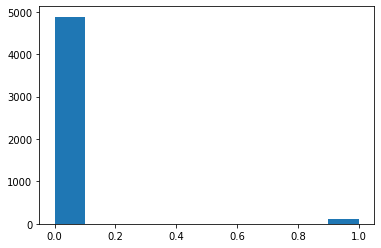

In [21]:
plt.hist(x_train[num])
count = 0
index_value = []
for i in range(len(x_train[num])):
    if(x_train[num][i]==1):
        count +=1
        index_value.append(i)

print("x_train[0]에서 1의 개수:",count)
print("x_train[0]의 평가:",evaluate[y_train[num]])
plt.show()

In [22]:
print("부정적인 단어의 포함 여부")
for i in index_value:
    for j in negative_word:
        if(i == j):
            print(reverse_word_index.get(i-3))

부정적인 단어의 포함 여부
but
bad
doesn't
worst
terrible
terribly
trashy


부정적인 단어가 7개가 나왔다. 머신은 이 단어들을 기반으로 negative로 판단 했을 수도 있다.

## Building yourt network

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf

In [25]:
model = models.Sequential()

In [26]:
model.add(layers.Dense(1000,activation='relu',input_shape=(num_words,)))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [27]:
print("parameter(weight)개수")
for i in range(len(model.weights)):
    print(model.weights[i].shape)

parameter(weight)개수
(5000, 1000)
(1000,)
(1000, 100)
(100,)
(100, 10)
(10,)
(10, 1)
(1,)


weight가 많다고 좋은 것은 아니다. 학습할 변수가 많으면 컴퓨터가 처리하기 어렵고, 그만큼 오래동안 학습해야 한다. 너무 많은 변수로 인해 데이터의 양상을 파악하기 어려워진다.

### Activation Function
**Sigmoid 함수**
$${sigmoid(x) = {1\over{1+e^{-x}}}}$$
- 신경망 초기에 많이 사용했지만, 여러 단점들 때문에 최근엔 binary_crossentropy빼고는 거의 사용 하지 않는다.
- 단점
    - **Gradient Vanishing** 발생: 미분함수에 대해 x=0에서 최대값 1/2을 가지고, input값이 일정이상 올라가면 미분값이 거의 0에 수렴하게된다. 이는 |x|값이 커질수록 Gradient Backpropagation시 미분값이 소실될 가능성이 크다.값이 커질 수록 Gradient Backpropagation시 미분값이 소실될 가능성이 크다.
    - exp 함수 사용시 계산처리 하는 데 비용이 크다.
    
**Tanh 함수**
$${tanh(x) = {{e^x - e^{-x}}\over{e^x+e^{-x}}}}$$
- tanh 함수는 함수의 중심값을 0으로 옮겨 sigmoid의 최적화 과정이 느려지는 문제를 해결
    - 시그모이드 함수와는 달리 0을 중심으로 하고 있는데, 이 때문에 시그모이드 함수와 비교하면 반환값(-1~1)의 변화폭이 더 크다.
    - 시그모이드 함수보다는 기울기 소실 증상이 적은 편이다.
- 미분함수에 대해 일정값 이상 커질시 미분값이 소실되는 gradient vanishing 문제는 여전히 남아있다.

**Relu 함수**
$${relu(x) = max(0,x)}$$
- 최근 신경망에서 가장 많이 사용하는 활성화 함수이다. 
- 장점
    - sigmoid, tanh 함수와 비교시 학습이 훨씬 빨라진다.
    - x값이 커져도 기울기가 오직 1이라 gradient vanishing가 거의 발생 하지 않다.
    - 미분값이 0 또는 1이라 계산처리 하는데 비용이 작다.
- 단점
    - x값이 0보다 작으면 미분은 0이 되어 x값에 해당되는 weight들이 모두 죽는다.
    - 차원이 높아질수록 saddle point(미분값은 0이지만 극대, 극소가 아닌 값)가 발생.

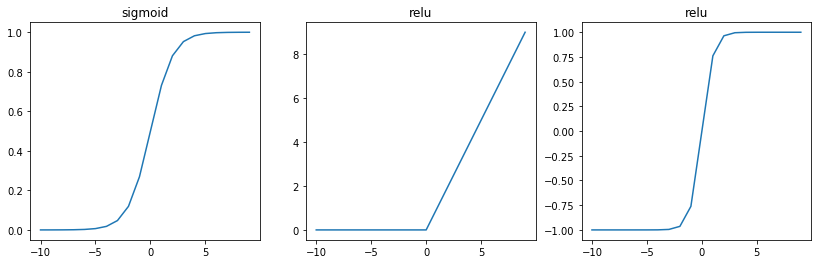

In [28]:
x = np.arange(-10,10)
sigmoid = 1/(1+np.exp(-x))
relu = np.maximum(x,0)
tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.title('sigmoid')
plt.plot(x,sigmoid)

plt.subplot(1,3,2)
plt.title('relu')
plt.plot(x,relu)

plt.subplot(1,3,3)
plt.title('relu')
plt.plot(x,tanh)
plt.show()

### Compiling the model
- Rmsprop -> Adam
- learning_rage = 0.001
- loss : binary_crossentroy
- 분류가 2개일 경우(2개일 경우, softmax보단 sigmoid가 더 낮다.)
$${J(w)=-{1\over m}\sum^m_{i=1} [y^{(i)}log(\sigma(w^T*\mathbf x))+(1-y^{(i)})log(1-\sigma(w^T*\mathbf x))]}$$

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy']
)

Adam Optimization는 momentam Optimization와 RMSProp를 합친 옵티마이저이다. 현재 가장 많이 쓰이는 옵티마이저이다. 

In [30]:
history = model.fit(partial_x_train,
                   partial_y_train,epochs=10,batch_size=250,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 3s 185us/sample - loss: 0.3663 - accuracy: 0.8411 - val_loss: 0.2919 - val_accuracy: 0.8767
Epoch 2/10
15000/15000 [==============================] - 2s 159us/sample - loss: 0.1545 - accuracy: 0.9433 - val_loss: 0.3415 - val_accuracy: 0.8699
Epoch 3/10
15000/15000 [==============================] - 2s 158us/sample - loss: 0.0510 - accuracy: 0.9852 - val_loss: 0.3959 - val_accuracy: 0.8726
Epoch 4/10
15000/15000 [==============================] - 2s 159us/sample - loss: 0.0089 - accuracy: 0.9987 - val_loss: 0.5126 - val_accuracy: 0.8724
Epoch 5/10
15000/15000 [==============================] - 2s 162us/sample - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.5720 - val_accuracy: 0.8714
Epoch 6/10
15000/15000 [==============================] - 2s 159us/sample - loss: 3.2643e-04 - accuracy: 1.0000 - val_loss: 0.6524 - val_accuracy: 0.8728
Epoch 7/10
15000/15000 [======================

In [31]:
history_dict = history.history

history_dict.keys()

loss_values = history_dict['loss']

accuracy = history_dict['accuracy']

val_loss = history_dict['val_loss']

val_accuracy = history_dict['val_accuracy']

epochs = np.arange(1,len(val_loss)+1)

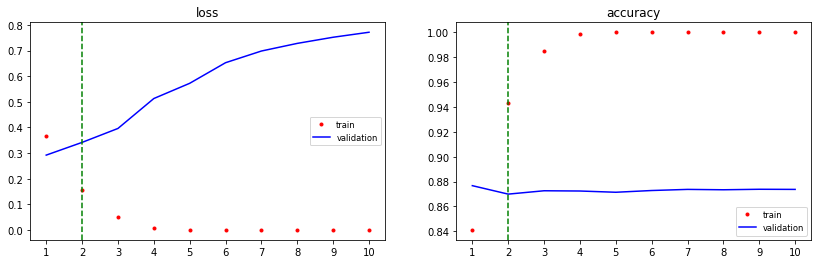

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title("loss")
plt.plot(epochs,loss_values,".r", label='train',)
plt.plot(epochs,val_loss,"-b", label='validation')
plt.legend(fontsize='small')
plt.axvline(2,color='g',linestyle='--')
plt.xticks(epochs)

plt.subplot(1,2,2)
plt.title("accuracy")
plt.plot(epochs,accuracy,".r", label='train')
plt.plot(epochs,val_accuracy,"-b", label='validation')
plt.legend(fontsize='small')
plt.axvline(2,color='g',linestyle='--')
plt.xticks(epochs)
plt.show()

위 loss, accuracy그래프를 보면 train의 loss와 accuracy가 빠르게 최적한 값에 도달하는 것을 볼수 있다. 반대로 validaion은 반대로 val_accuracy는 epoch를 돌리더라도 딱히 큰 변화가 일어나지 않는다. 위에 있는 결과를 봤을 때 train 데이터에 대해서 너무 overfitting 된 것을 알 수 있다. 즉 train의 loss와 accuracy의 값이 너무 빠르게 최적의 값에 도달되어 validation 데이터에 대한 예측률이 떨어 진거 같다. 따라서 learing의 값과 batch_size 값을 더 낮추고, 반대로 epoch는 많이 하면 과적합 될 확률이 높아 조금 낮추겠다.

### Testing

In [33]:
result = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 3s 114us/sample - loss: 0.8222 - accuracy: 0.8658


In [34]:
print("loss",result[0])
print("accuracy",result[1])

loss 0.8222119748842717
accuracy 0.86576


## Retraining a model from scratch
- batch_size = 100
- learning_rate = 0.00001
- epoch = 7

In [66]:
model = models.Sequential()

In [67]:
model.add(layers.Dense(5000,activation='relu',input_shape=(num_words,)))
model.add(layers.Dense(1000,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [68]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy']
)

In [69]:
history = model.fit(partial_x_train,
                   partial_y_train,epochs=7,batch_size=100,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/7
15000/15000 [==============================] - 25s 2ms/sample - loss: 0.6055 - accuracy: 0.7421 - val_loss: 0.4985 - val_accuracy: 0.8252
Epoch 2/7
15000/15000 [==============================] - 24s 2ms/sample - loss: 0.3966 - accuracy: 0.8619 - val_loss: 0.3585 - val_accuracy: 0.8609
Epoch 3/7
15000/15000 [==============================] - 25s 2ms/sample - loss: 0.2817 - accuracy: 0.8989 - val_loss: 0.3081 - val_accuracy: 0.8770
Epoch 4/7
15000/15000 [==============================] - 25s 2ms/sample - loss: 0.2199 - accuracy: 0.9245 - val_loss: 0.2917 - val_accuracy: 0.8835
Epoch 5/7
15000/15000 [==============================] - 24s 2ms/sample - loss: 0.1764 - accuracy: 0.9424 - val_loss: 0.2860 - val_accuracy: 0.8864
Epoch 6/7
15000/15000 [==============================] - 24s 2ms/sample - loss: 0.1404 - accuracy: 0.9597 - val_loss: 0.2874 - val_accuracy: 0.8851
Epoch 7/7
15000/15000 [==============================] - 24s 2

In [70]:
history_dict = history.history

history_dict.keys()

loss_values = history_dict['loss']

accuracy = history_dict['accuracy']

val_loss = history_dict['val_loss']

val_accuracy = history_dict['val_accuracy']

epochs = np.arange(1,len(val_loss)+1)

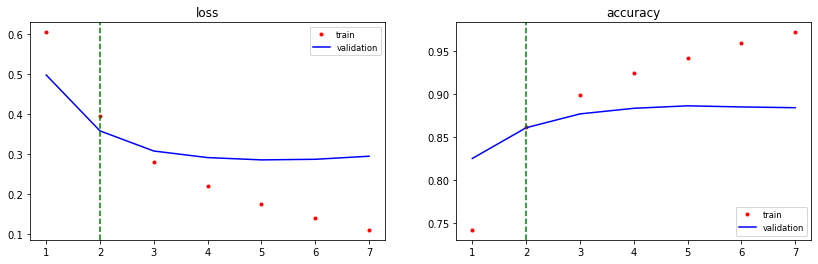

In [71]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title("loss")
plt.plot(epochs,loss_values,".r", label='train',)
plt.plot(epochs,val_loss,"-b", label='validation')
plt.legend(fontsize='small')
plt.axvline(2,color='g',linestyle='--')
plt.xticks(epochs)

plt.subplot(1,2,2)
plt.title("accuracy")
plt.plot(epochs,accuracy,".r", label='train')
plt.plot(epochs,val_accuracy,"-b", label='validation')
plt.legend(fontsize='small')
plt.axvline(2,color='g',linestyle='--')
plt.xticks(epochs)
plt.show()
plt.show()

In [72]:
results = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 9s 369us/sample - loss: 0.3031 - accuracy: 0.8802


In [73]:
print("loss",results[0])
print("accuracy",results[1])

loss 0.3031104809761047
accuracy 0.88016


아까보다 accuracy가 0.2정도 더 올랐다. 확실치 않지만, 이번에 나온 accuracy과 loss의 최대값이다. 모델에서 오를 수 있는 최대의 값이다. 지금 나온 accuracy값이 나쁘지는 않지만 accuracy를 더 높이기 위해서는 이 모델보다 더 좋은 모델을 사용해야 한다. Fully Connected Layer만으로 시계열데이터를 학습하는 데 다소 무리일 수 있다. 그래서 주로 이러한 시계열 데이터는 RNN에서 효과를 발휘한다.

In [74]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 5000)              25005000  
_________________________________________________________________
dense_33 (Dense)             (None, 1000)              5001000   
_________________________________________________________________
dense_34 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 101       
Total params: 30,106,201
Trainable params: 30,106,201
Non-trainable params: 0
_________________________________________________________________


## IMDB사이트 에서 가져온 리뷰 데이터로 직접 예측해보기
- 영화 이름: Fantasy Island
- 리뷰 라벨: negative
- https://www.imdb.com/title/tt0983946/reviews?ref_=tt_ov_rt
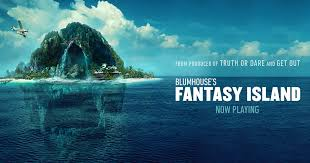

In [75]:
IMBD_review = "bad movie bad movie go to your room forever i don't know where to start the convoluted attempt at anything close to a plot the juvenile writing the bad acting all around the movie should not have been called fantasy island it should have been called clue cause no one involved had one "+"however i do credit it for a first in the life as in the first time we in the audience had a conversation with show of hands just how bad an experience this was a horribly disfigured baby "+"please spare yourself don't watch it it's too late for me but if i spared just one of you maybe my sacrifice is worth it"

In [76]:
IMBD_review_list = [] 

In [77]:
for i in IMBD_review.split():
    IMBD_review_list.append(word_index[i]+3)# 0,1,2인덱스는 필요없는 데이터이므로 3를 더해주어야함.
IMBD_review_list.remove(11085) # 인덱스 5000을 넘어 가는 단어 제거.
IMBD_review_list.remove(11745)

In [78]:
decode_review = ' '.join(
    [reverse_word_index.get(i-3, "") for i in IMBD_review_list]
)
print(decode_review)
print("")
print("label=","negative")

bad movie bad movie go to your room forever i don't know where to start the convoluted attempt at anything close to a plot the juvenile writing the bad acting all around the movie should not have been called fantasy island it should have been called clue cause no one involved had one however i do credit it for a first in the life as in the first time we in the audience had a conversation with show of hands just how bad an experience this was a horribly baby please spare yourself don't watch it it's too late for me but if i just one of you maybe my sacrifice is worth it

label= negative


In [79]:
IMDB_review_data = np.reshape(IMBD_review_list,(1,len(IMBD_review_list)))
print("형태:",IMDB_review_data.shape)

형태: (1, 114)


In [80]:
IMDB_review_data = vectorize_sequences(IMDB_review_data)

데이터 형태: (1, 5000)


In [81]:
IMDB_review_data[0,:100]

array([0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.])

In [82]:
predict = model.predict(IMDB_review_data)[0,0]
print("리뷰에 대한 postive일 확률이",predict,"이다. 따라서 머신은 이 리뷰에 대해",evaluate[int(model.predict(IMDB_review_data))],"라고 예측한다.")

리뷰에 대한 postive일 확률이 0.02364487 이다. 따라서 머신은 이 리뷰에 대해 negative 라고 예측한다.
